In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from sklearn.decomposition import PCA

### Plot Histogram

Dataset shape: (18000, 9)


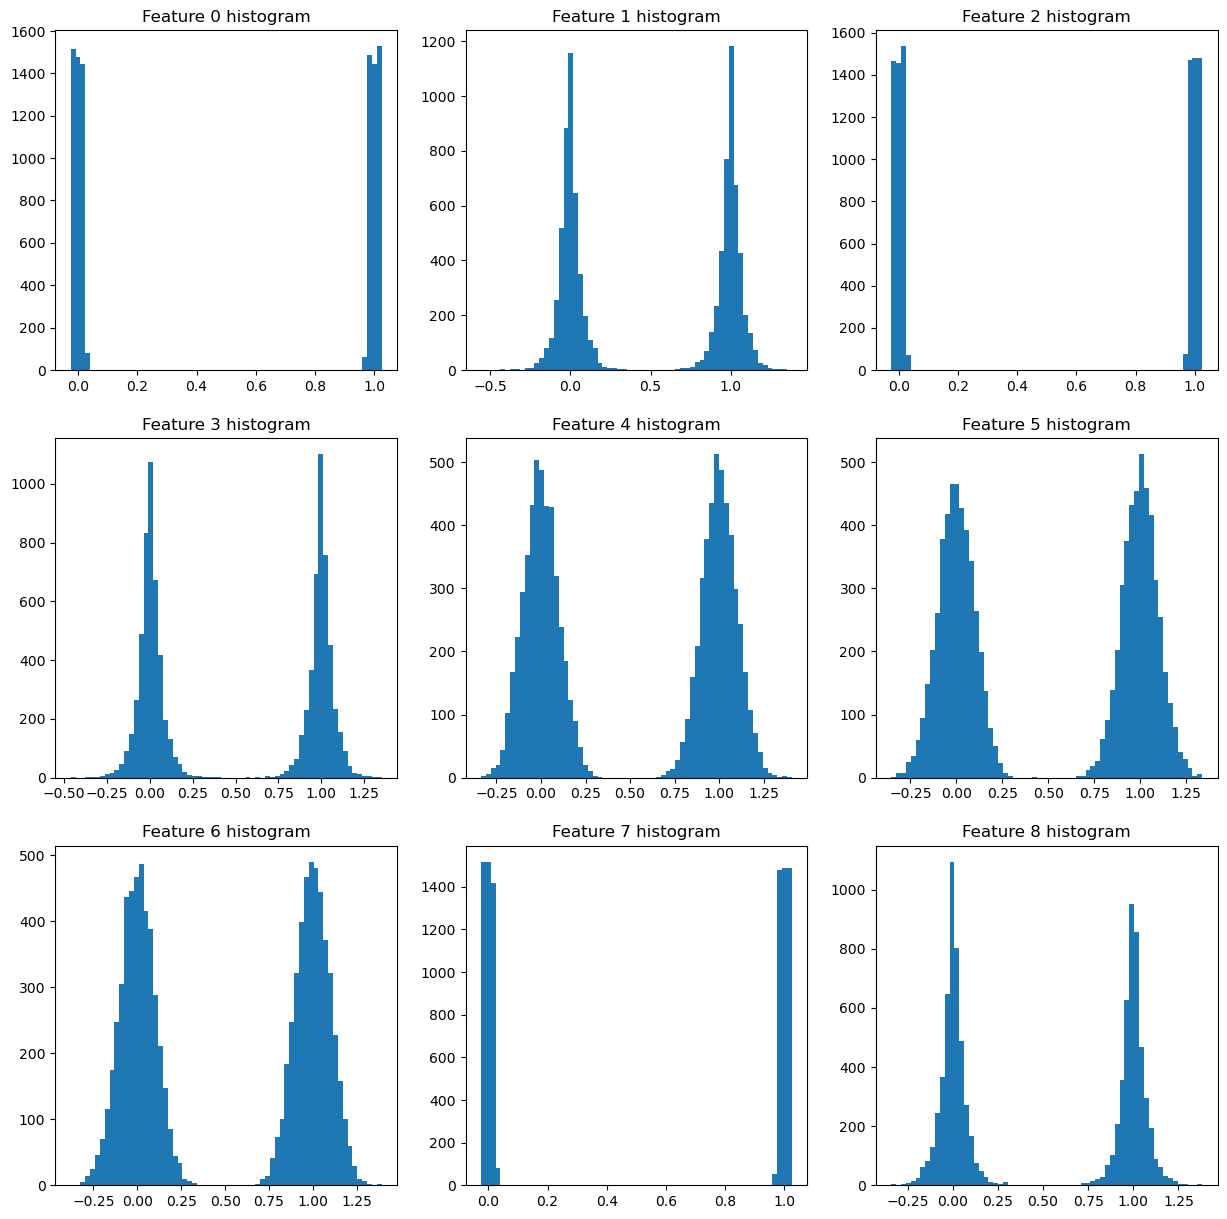

In [9]:
dimension =9
nrows = 3
ncols = dimension // nrows
X = np.load(f"Datasets/kryptonite-{dimension}-X.npy")
Y = np.load(f"Datasets/kryptonite-{dimension}-y.npy")
print(f"Dataset shape: {X.shape}")

one_ids = np.where(Y == 1)[0]
zero_ids = np.where(Y == 0)[0]

X_ones = X[one_ids, :]
X_zeros = X[zero_ids, :]

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 15))
#fig.suptitle(f"Histogram for dimension-{dimension} dataset features") 

for row in range(nrows):
    for col in range(ncols):
        feat_id = row*ncols + col
        ax[row, col].hist(X_ones[:, feat_id], bins=64)
        ax[row, col].title.set_text(f"Feature {feat_id} histogram")

Dimension:9
Dataset shape: (18000, 9)


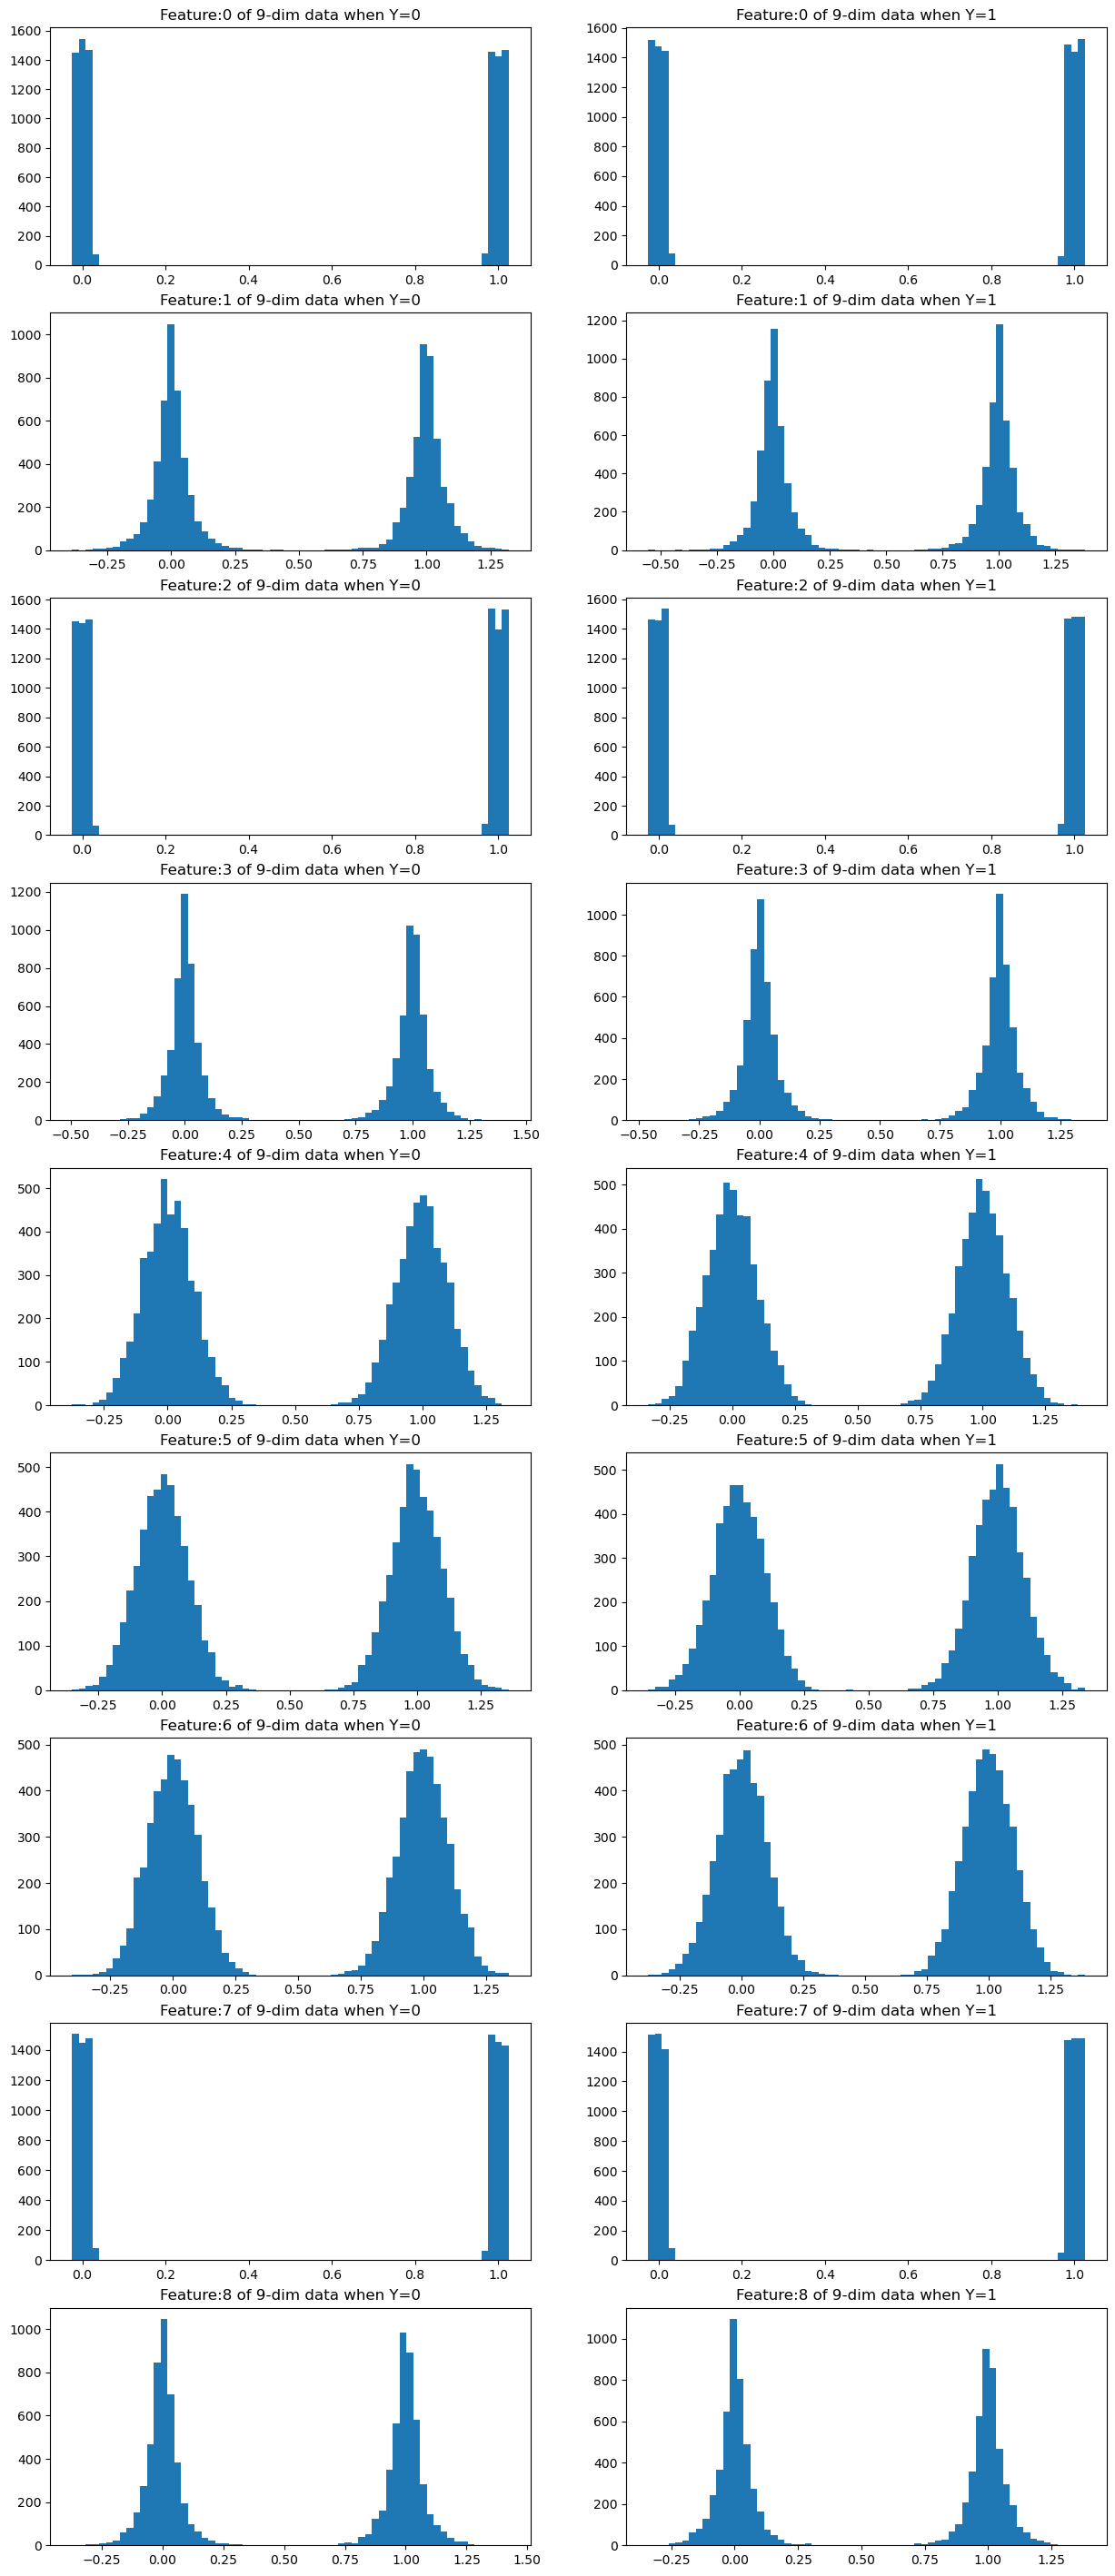

In [11]:
# Plot histogram for each label

dimensions = [9, 12, 15, 18, 24, 30, 45]

for dimension in [9]:#dimensions:
    print("="*48)
    print(f"Dimension:{dimension}")

    X = np.load(f"Datasets/kryptonite-{dimension}-X.npy")
    Y = np.load(f"Datasets/kryptonite-{dimension}-y.npy")
    print(f"Dataset shape: {X.shape}")
    
    one_ids = np.where(Y == 1)[0]
    zero_ids = np.where(Y == 0)[0]

    X_ones = X[one_ids, :]
    X_zeros = X[zero_ids, :]
    
    fig, ax = plt.subplots(nrows=dimension, ncols=2, figsize=(15, dimension*4))
    #fig.suptitle(f"Histogram for dimension-{dimension} dataset features") 

    for row in range(dimension):
        for col in range(2):
            if col == 0:
                ax[row, col].hist(X_zeros[:, row], bins=64)
            if col == 1:
                ax[row, col].hist(X_ones[:, row], bins=64)
            ax[row, col].title.set_text(f"Feature:{row} of {dimension}-dim data when Y={col}")

### Plot 2 features 

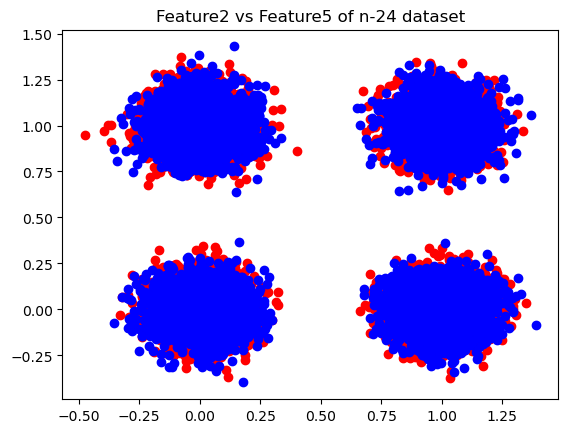

In [4]:
dimension = 24
X = np.load(f"Datasets/kryptonite-{dimension}-X.npy")
Y = np.load(f"Datasets/kryptonite-{dimension}-y.npy")

n_elements_to_plot = 10000

one_ids = np.where(Y == 1)[0]
zero_ids = np.where(Y == 0)[0]

X_ones = X[one_ids, :]
X_zeros = X[zero_ids, :]

feature1_idx = 2
feature2_idx = 5
plt.scatter(X_ones[:n_elements_to_plot, feature1_idx], X_ones[:n_elements_to_plot, feature2_idx], c='r')
plt.scatter(X_zeros[:n_elements_to_plot, feature1_idx], X_zeros[:n_elements_to_plot, feature2_idx], c='b')
plt.title(f"Feature{feature1_idx} vs Feature{feature2_idx} of n-{dimension} dataset")
plt.show()

### Plot sum

Mean of feature sum Y=0: 12.014368057250977
Mean of feature sum Y=1: 11.985426902770996


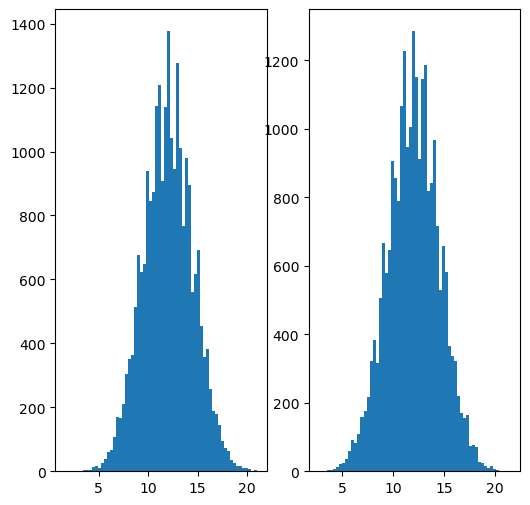

In [8]:
X0_flattened = np.sum(X_zeros, axis=1)
X1_flattened = np.sum(X_ones, axis=1)

pfig, ax = plt.subplots(nrows=1, ncols=2, figsize=(6, 6))

for col in range(2):
  if col == 0:
    ax[col].hist(X0_flattened, bins=64)
  if col == 1:
    ax[col].hist(X1_flattened, bins=64)
  #ax[row, col].title.set_text(f"Feature:{row} Y={col}")
print(f"Mean of feature sum Y=0: {np.mean(X0_flattened)}")
print(f"Mean of feature sum Y=1: {np.mean(X1_flattened)}")

### Singular value check

In [12]:
singular_values = []
dimensions = [9, 12, 15, 24, 30, 45]
for n in dimensions:
    X = np.load(f"Datasets/kryptonite-{n}-X.npy")
    Y = np.load(f"Datasets/kryptonite-{n}-y.npy")
    print(f"Dataset shape: {X.shape}")

    # Perform SVD
    U, S, VT = np.linalg.svd(X, full_matrices=False)
    print(f"N:{n} S:{S}")
    singular_values.append(S)

Dataset shape: (18000, 9)
N:9 S:[212.07797   68.88446   68.35371   68.09474   67.628876  67.45177
  67.24188   67.05245   66.47136 ]
Dataset shape: (24000, 12)
N:12 S:[279.4213    79.85318   79.344894  79.04474   78.7651    78.218254
  78.13579   78.038574  77.548004  77.309715  77.19786   76.43244 ]
Dataset shape: (30000, 15)
N:15 S:[346.75403   89.43627   89.01632   88.68394   88.45461   87.963875
  87.783035  87.40816   87.35547   87.23582   86.94497   86.48675
  86.38618   86.24687   85.253914]
Dataset shape: (48000, 24)
N:24 S:[548.0493   113.12179  112.7516   112.67979  112.23401  112.16129
 111.919525 111.6866   111.67125  111.1161   111.08503  110.749176
 110.59346  110.32369  110.09461  109.74853  109.63561  109.45199
 109.35428  109.18085  108.92846  108.79763  108.56713  108.1057  ]
Dataset shape: (60000, 30)
N:30 S:[682.06604  126.39058  126.35929  126.1538   125.861275 125.557655
 125.17385  125.01586  124.89309  124.80968  124.47234  124.45271
 124.11731  123.97038  123.8

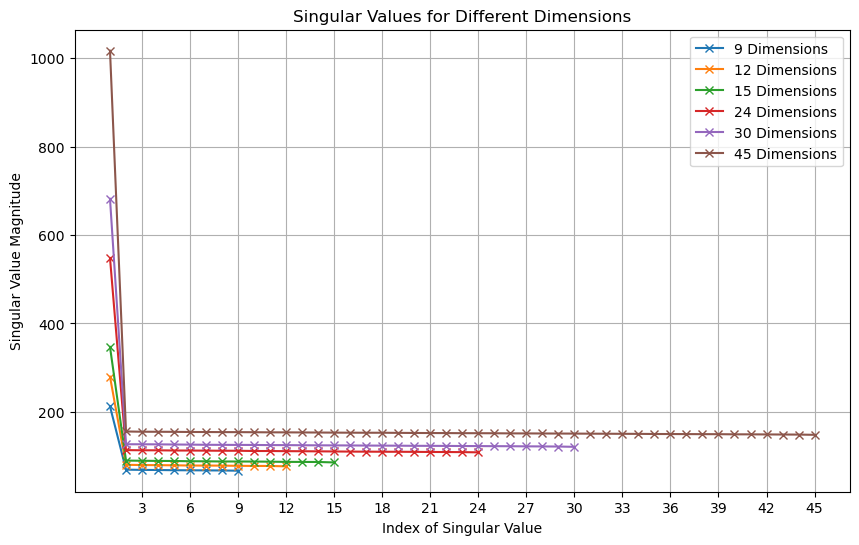

In [13]:
# Plot each set of singular values
plt.figure(figsize=(10, 6))
for sv, dim in zip(singular_values, dimensions):
    plt.plot(sv, marker='x', label=f"{dim} Dimensions")


max_length = max(len(sv) for sv in singular_values)
plt.xticks(ticks = range(2, max_length+2, 3),
           labels = [f"{i+1}" for i in range(2, max_length+2, 3)])

# Labels and title
plt.xlabel("Index of Singular Value")
#plt.xticks([dimensions])
plt.ylabel("Singular Value Magnitude")
plt.title("Singular Values for Different Dimensions")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

### Explained variance chceck

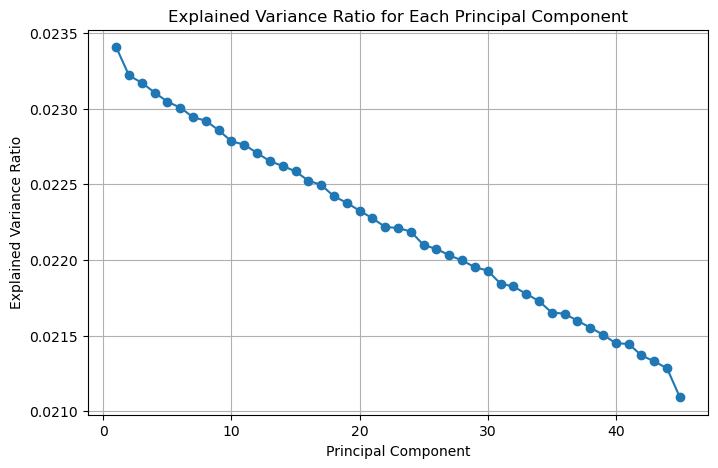

In [15]:
pca = PCA()
pca.fit(X)

# Explained variance ratio (percentage of variance explained by each component)
explained_variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Each Principal Component')
plt.grid(True)
plt.show()

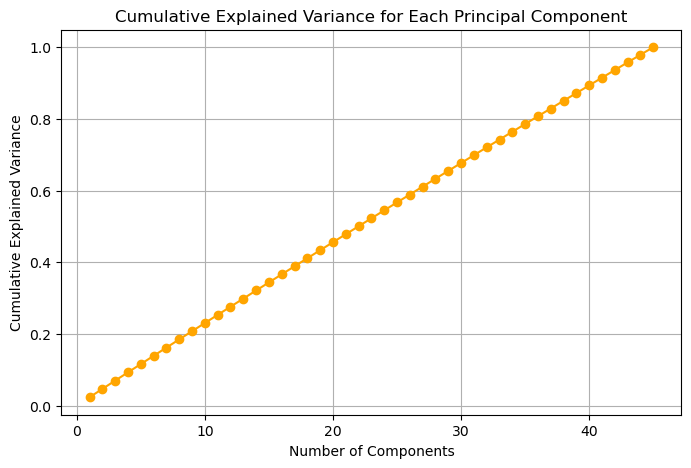

In [10]:
# Cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plotting the cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', color='orange')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance for Each Principal Component')
plt.grid(True)
plt.show()

### Mutual Information

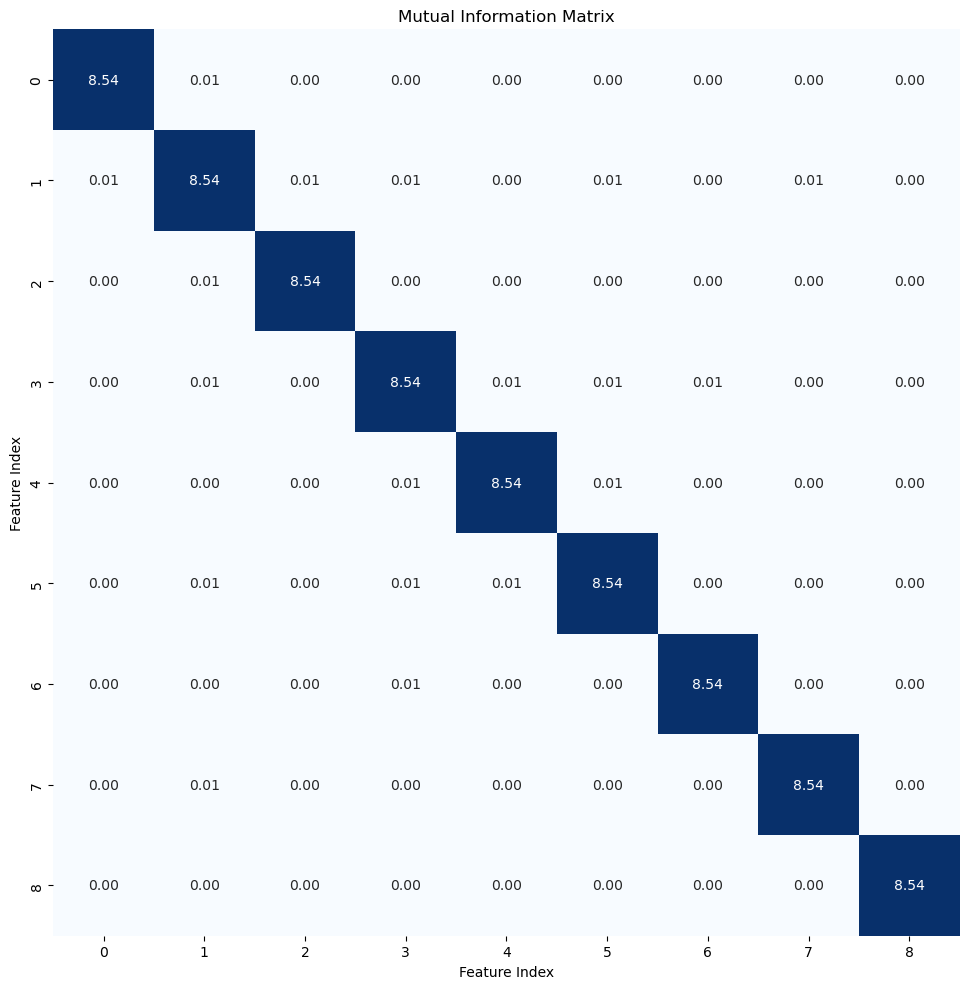

In [ ]:
from sklearn.metrics import mutual_info_score
from sklearn.feature_selection import mutual_info_regression

n=9
X = np.load(f"Datasets/kryptonite-{n}-X.npy")
Y = np.load(f"Datasets/kryptonite-{n}-y.npy")

pca = PCA()
pca.fit(X)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
                                          
mi_arr = np.zeros((n, n))
for i in range(n):
    mi_arr[:,i] = mutual_info_regression(X, X[:,i])

plt.figure(figsize=(10, 10))
sns.heatmap(mi_arr, annot=True, fmt='.2f', cmap='Blues', xticklabels=[f"{i}" for i in range(n)],
            yticklabels=[f"{i}" for i in range(n)], square=True, cbar=False)#, ax=axs[0])

plt.xlabel('Feature Index')
plt.ylabel('Feature Index')
plt.title('Mutual Information Matrix')

plt.tight_layout()
plt.show()

### Cluster/Corner label checking

Dimension:9 Dataset shape: (18000, 9)
Preprocessed shape: (18000, 9)
512 different groups in 18000 data, on average 35.16 points per cluster
Most common: [(258, 55), (310, 52), (145, 52), (359, 51), (57, 51), (475, 51), (125, 50), (342, 50), (367, 49), (20, 49), (315, 49), (74, 48), (106, 48), (305, 48), (122, 48), (66, 47), (501, 47), (250, 47), (331, 47), (4, 47), (362, 47), (270, 47), (163, 46), (505, 46), (388, 46), (196, 46), (308, 46), (281, 46), (194, 46), (65, 45), (256, 45), (312, 45), (189, 45), (103, 45), (222, 45), (373, 45), (124, 45), (454, 45), (484, 45), (237, 45), (318, 45), (208, 45), (469, 45), (3, 45), (239, 45), (204, 44), (1, 44), (301, 44), (366, 44), (279, 44), (349, 44), (64, 44), (117, 43), (352, 43), (167, 43), (400, 43), (164, 43), (233, 43), (252, 43), (215, 43), (339, 43), (433, 43), (244, 43), (323, 43), (254, 43), (246, 43), (269, 43), (46, 43), (347, 43), (429, 43), (355, 43), (159, 43), (73, 42), (345, 42), (135, 42), (231, 42), (83, 42), (43, 42), (12

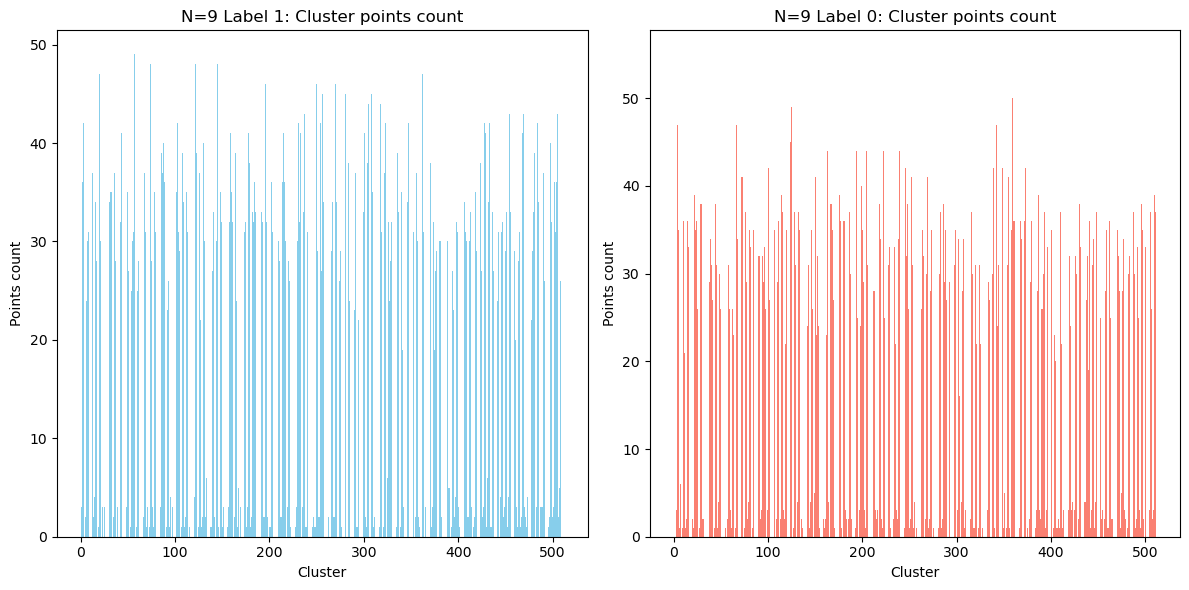

Dimension:12 Dataset shape: (24000, 12)
Preprocessed shape: (24000, 12)
4081 different groups in 24000 data, on average 5.88 points per cluster
Most common: [(2610, 18), (3191, 16), (1008, 16), (3939, 16), (4000, 15), (3837, 15), (934, 14), (3297, 14), (1994, 14), (1396, 14), (566, 14), (1273, 14), (3166, 14), (2785, 14), (2637, 14), (2912, 14), (190, 13), (603, 13), (1372, 13), (4019, 13), (4048, 13), (3880, 13), (511, 13), (3332, 13), (2907, 13), (2625, 13), (810, 13), (1552, 13), (1211, 13), (809, 13), (816, 13), (611, 13), (2695, 13), (1025, 13), (3278, 13), (1246, 13), (1315, 13), (2964, 13), (672, 13), (220, 13), (1534, 12), (3335, 12), (774, 12), (2723, 12), (890, 12), (1797, 12), (551, 12), (1771, 12), (2649, 12), (2581, 12), (1070, 12), (1045, 12), (348, 12), (2216, 12), (1823, 12), (3039, 12), (3233, 12), (683, 12), (2607, 12), (1533, 12), (2417, 12), (107, 12), (462, 12), (1256, 12), (80, 12), (871, 12), (509, 12), (1103, 12), (867, 12), (1740, 12), (2178, 12), (3126, 12), (

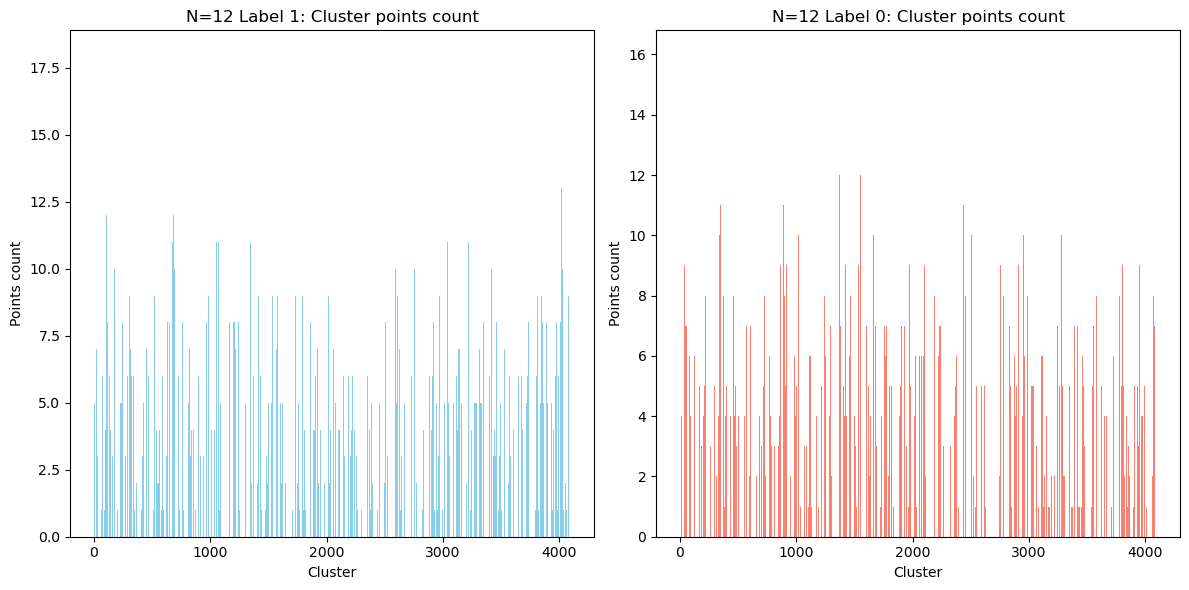

Dimension:15 Dataset shape: (30000, 15)
Preprocessed shape: (30000, 15)
19566 different groups in 30000 data, on average 1.53 points per cluster
Most common: [(9788, 7), (28836, 7), (16370, 7), (1153, 6), (7718, 6), (15950, 6), (17958, 6), (23913, 6), (18557, 6), (11410, 6), (15370, 6), (12834, 6), (14533, 6), (25006, 6), (19128, 5), (21286, 5), (17106, 5), (32647, 5), (17934, 5), (15546, 5), (28785, 5), (31454, 5), (14946, 5), (25352, 5), (27311, 5), (19616, 5), (26485, 5), (4344, 5), (30739, 5), (10840, 5), (28834, 5), (1265, 5), (12448, 5), (5426, 5), (187, 5), (4103, 5), (28951, 5), (8399, 5), (16933, 5), (3670, 5), (560, 5), (31732, 5), (24590, 5), (27449, 5), (24240, 5), (647, 5), (7570, 5), (8778, 5), (30745, 5), (17685, 5), (13034, 5), (22725, 5), (3717, 5), (15705, 5), (26042, 5), (20926, 5), (24281, 5), (9460, 5), (13778, 5), (9083, 5), (6059, 5), (12284, 5), (7334, 5), (9809, 5), (16800, 5), (23306, 5), (14934, 5), (14950, 5), (17780, 5), (24718, 5), (4513, 5), (7020, 5), (1

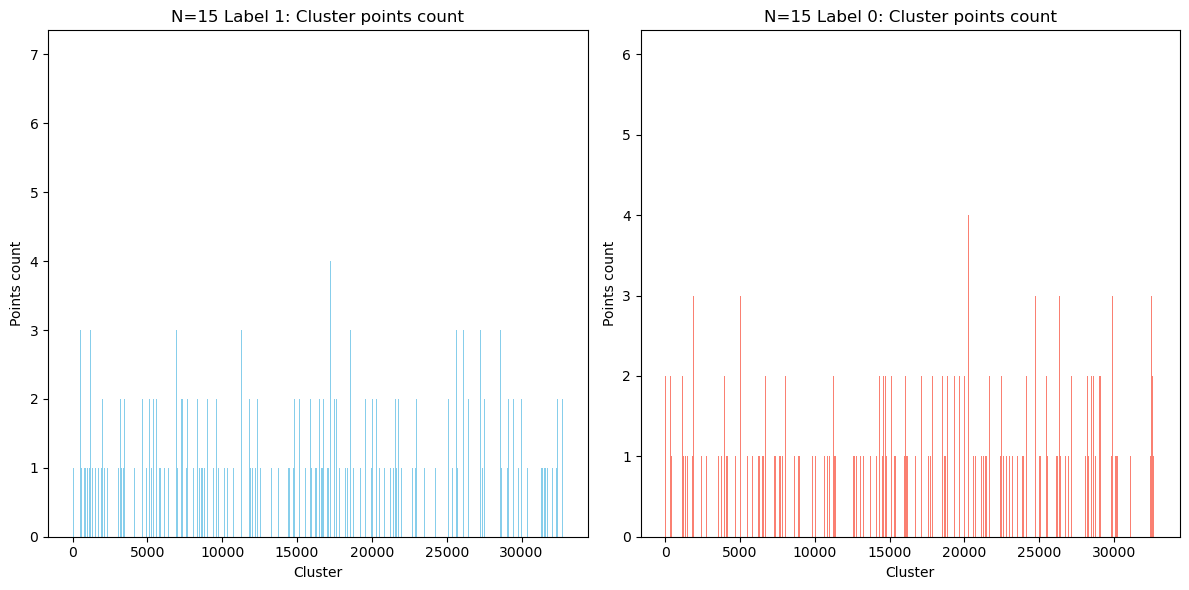

Dimension:18 Dataset shape: (36000, 18)
Preprocessed shape: (36000, 18)
33686 different groups in 36000 data, on average 1.07 points per cluster
Most common: [(230465, 4), (224362, 4), (213459, 3), (228747, 3), (60992, 3), (150994, 3), (212799, 3), (65784, 3), (190982, 3), (261780, 3), (21573, 3), (70289, 3), (224455, 3), (82293, 3), (226496, 3), (87741, 3), (253212, 3), (133533, 3), (233203, 3), (242911, 3), (4840, 3), (223226, 3), (236530, 3), (22508, 3), (261277, 3), (14593, 3), (94739, 3), (110351, 3), (104830, 3), (226948, 3), (74309, 3), (198071, 3), (113919, 3), (91781, 3), (84401, 3), (259030, 3), (171597, 3), (260768, 3), (254311, 3), (171089, 3), (126446, 3), (30867, 3), (183760, 3), (149166, 3), (234771, 3), (30169, 3), (216933, 3), (146495, 3), (152562, 3), (220437, 3), (223518, 3), (194609, 3), (70465, 3), (134986, 3), (43009, 3), (27381, 3), (3804, 3), (86639, 3), (238980, 3), (88977, 3), (42991, 3), (113388, 3), (253754, 3), (131735, 3), (29970, 3), (162149, 3), (213262,

In [17]:
label_errors = []
data_pt_per_corners = []

for dimension in [9, 12, 15, 18, 24, 30, 45]:
    X = np.load(f"Datasets/kryptonite-{dimension}-X.npy")
    Y = np.load(f"Datasets/kryptonite-{dimension}-y.npy")
    print("="*48)
    print(f"Dimension:{dimension} Dataset shape: {X.shape}")

    dim = X.shape[1]
    X_rounded = np.round(X).astype(int)
    X_rounded[X_rounded<0] = 0
    print(f"Preprocessed shape: {X_rounded.shape}")
    X_dec = np.zeros(X.shape[0], dtype=int)
    for i in range(dim):
        X_dec += X_rounded[:,i] * (2**i)
        
    xd = X_dec.copy()
    
    one_ids = np.where(Y == 1)[0]
    zero_ids = np.where(Y == 0)[0]
    X_ones = xd[one_ids]
    X_zeros = xd[zero_ids]
    
    all_cntr = Counter(xd)
    n_per_cluster = xd.shape[0] / len(all_cntr.items())
    data_pt_per_corners.append(n_per_cluster)
    print(f"{len(all_cntr.items())} different groups in {xd.shape[0]} data, on average {n_per_cluster:.02f} points per cluster")
    print(f"Most common: {all_cntr.most_common()}")
    cntr_ones = Counter(X_ones)
    #print(f"Counts for 1 label: {cntr_ones}")
    cntr_zeros = Counter(X_zeros)
    #print(f"Counts for 0 label: {cntr_zeros}")
    
    ones_set = set(X_ones)
    #print(f"Ones set: {ones_set}")
    zeros_set = set(X_zeros)
    #print(f"Zeros set: {zeros_set}")
    
    intersection_set = ones_set.intersection(zeros_set)
    print(f"Intersection set: {intersection_set}")
    intersectin_min_cnt = 0
    intersection_total = 0
    for val in intersection_set:
        intersectin_min_cnt += min(cntr_ones[val], cntr_zeros[val])
        intersection_total += cntr_ones[val] + cntr_zeros[val]
        #print(f" {val} has label 1 for {cntr_ones[val]} times, label 0 for {cntr_zeros[val]} times")
    if intersectin_min_cnt == 0:
        label_errors.append(0)
    else:
        label_errors.append(100.0*intersectin_min_cnt/(2000*dimension))
    #print(f"Intersection pct {intersectin_min_cnt}/{2000*dimension}")
    
    if dimension > 15:
        continue
    
    counter1 = Counter(X_ones)
    counter2 = Counter(X_zeros)

    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    ax[0].bar(counter1.keys(), counter1.values(), color='skyblue')
    ax[0].set_xlabel('Cluster')
    ax[0].set_ylabel('Points count')
    ax[0].set_title(f"N={dimension} Label 1: Cluster points count")

    ax[1].bar(counter2.keys(), counter2.values(), color='salmon')
    ax[1].set_xlabel('Cluster')
    ax[1].set_ylabel('Points count')
    ax[1].set_title(f"N={dimension} Label 0: Cluster points count")

    plt.tight_layout()
    plt.show()

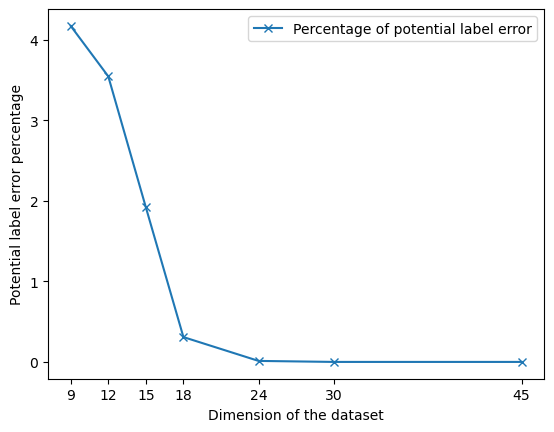

In [20]:
dimensions = [9, 12, 15, 18, 24, 30, 45]

plt.plot(dimensions, label_errors, marker='x', label=f"Percentage of potential label error")
plt.xlabel(f"Dimension of the dataset")
plt.ylabel(f"Potential label error percentage")
plt.legend()
plt.xticks(dimensions)
plt.show()

### Dataset size vs Corners

Dim:9 n_data: 18000 n_corners:512
Dim:12 n_data: 24000 n_corners:4096
Dim:15 n_data: 30000 n_corners:32768
Dim:18 n_data: 36000 n_corners:262144
Dim:24 n_data: 48000 n_corners:16777216
Dim:30 n_data: 60000 n_corners:1073741824
Dim:45 n_data: 90000 n_corners:35184372088832


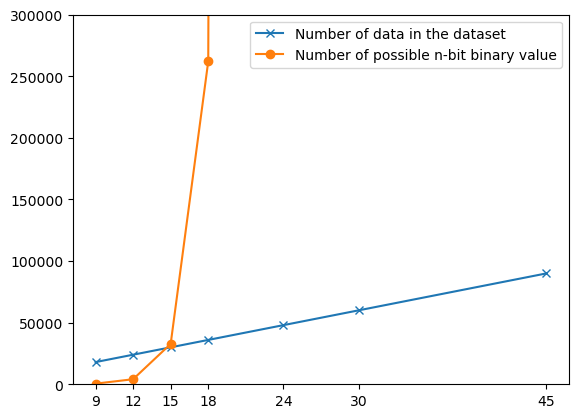

In [19]:
n_corners = []
n_dataset = []

dimensions = [9, 12, 15, 18, 24, 30, 45]
for dimension in [9, 12, 15, 18, 24, 30, 45]:
    n_corner = 2**dimension
    n_data = 2000*dimension
    print(f"Dim:{dimension} n_data: {n_data} n_corners:{n_corner}")
    n_corners.append(n_corner)
    n_dataset.append(n_data)
    
plt.plot(dimensions, n_dataset, marker='x', label=f"Number of data in the dataset")
plt.plot(dimensions, n_corners, marker='o', label=f"Number of possible n-bit binary value")
plt.legend()
plt.ylim(0, 300000)
plt.xticks(dimensions)
plt.show()